In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import copy

In [17]:
%load_ext autoreload
%autoreload 2

# Prepare Data

## Load Data

In [6]:
from sklearn.datasets import load_breast_cancer

In [7]:
def load_dataset():
    data = load_breast_cancer()
    df = pd.DataFrame(data['data'])
    df.columns = data['feature_names']
    df['cat 1'] = (df['mean radius'] + df['mean texture'] < df['worst radius'] / 0.5).astype('int')
    df['cat 2'] = (df['mean compactness'] * df['mean concavity'] < df['mean smoothness'] / 10).astype('int')
    df['cat 3'] = (df['mean symmetry'] / df['mean smoothness'] < df['worst symmetry'] * 7).astype('int')

    return copy.deepcopy(df)

In [8]:
df = load_dataset()
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cat 1,cat 2,cat 3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1,0,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1,1,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1,0,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,0,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1,0,0


## Simulate missing values

In [9]:
# 30% of data will be NaN
missing = 0.3
i_range, j_range = df.shape

for i in range(i_range):
    for j in range(j_range):
        if np.random.rand() < missing:
            df.iloc[i, j] = np.nan
            
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cat 1,cat 2,cat 3
0,NaN,10.38,NaN,NaN,0.1184,0.27760,0.3001,0.14710,0.2419,0.07871,...,2019.0,0.1622,0.6656,NaN,0.2654,0.4601,0.11890,1.0,0.0,NaN
1,20.57,17.77,132.9,1326.0,NaN,0.07864,0.0869,0.07017,0.1812,0.05667,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,NaN,1.0,NaN,0.0
2,19.69,21.25,130.0,1203.0,NaN,0.15990,NaN,0.12790,NaN,0.05999,...,1709.0,NaN,0.4245,0.4504,NaN,0.3613,0.08758,1.0,0.0,1.0
3,NaN,NaN,NaN,NaN,0.1425,0.28390,0.2414,0.10520,0.2597,0.09744,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,0.0,1.0
4,20.29,NaN,NaN,1297.0,0.1003,0.13280,0.1980,0.10430,0.1809,0.05883,...,NaN,0.1374,NaN,0.4000,0.1625,0.2364,0.07678,1.0,NaN,NaN


# Interpolator Usage

## Load interpolator

In [18]:
from interpolator import Interpolator
# Load core model
from sklearn.ensemble import RandomForestRegressor

In [36]:
# With normalization
ip_model = Interpolator(model=RandomForestRegressor(), normalize=True, normalize_algorithm='minmax', n_iter=10, verbose=True)

## Use Interplolator

In [22]:
df_result = ip_model_n.fill_na(df.copy())

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:52<00:00, 11.25s/it]


## Evaluate

In [44]:
print("Mean R-squared score:\n")
[print(f"\tIteration #{i+1}:\t{round(score*100, 3)}") for i, score in enumerate(ip_model_n.score_history)]
pass

Mean R-squared score:

	Iteration #1:	96.776
	Iteration #2:	97.37
	Iteration #3:	97.353
	Iteration #4:	97.406
	Iteration #5:	97.42
	Iteration #6:	97.379
	Iteration #7:	97.4
	Iteration #8:	97.345
	Iteration #9:	97.399
	Iteration #10:	97.406


In [48]:
df_full = load_dataset()
df_full_n = (df_full - df_full.min()) / (df_full.max() - df_full.min())
df_result_n = (df_result - df_result.min()) / (df_result.max() - df_result.min())

mae = np.abs(df_result - df_full).to_numpy().flatten().mean()
mape = np.abs(df_result_n - df_full_n).to_numpy().flatten().mean()

print(f"MAE:\t{round(mae, 3)}")
print(f"MAPE:\t{round(mape*100, 3)}%")

MAE:	0.793
MAPE:	2.749%


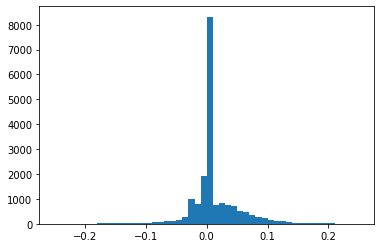

In [57]:
plt.hist((df_result_n - df_full_n).to_numpy().flatten(), bins=50, range=(-0.25, 0.25))
plt.show()